## Achsenlast

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from datetime import date, time
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

### Jahresuebersicht

In [3]:
df = pd.read_excel('/media/rafael/KINGSTON/Daten/ALJA_2014_BY/ALJA_2014.xlsx')

In [4]:
df.head(10)

,BASt-Nr.,TK-Blatt,Name,Straße,Land,DTV aus SVZ 2010,SV-Anteil aus SVZ 2010,Richtung,Fernziel,Nahziel,...,Ant 14t<AG<=15t Q4,Ant 15t<AG<=16t Q4,Ant AG>16t Q4,m,b,R*R,Koor_UTM32_E,Koor_UTM32_N,Koor_WGS84_N,Koor_WGS84_E
0,9628,7345,Aicha vorm Wald,A3,Bayern,42200,20.5,1,Nürnberg,Garham/Vilshofen,...,0.112777,0.040606,0.018888,0.0718,1.3110,0.9758,812937.7425,5399842.1835,48.673095,13.251213
1,9628,7345,Aicha vorm Wald,A3,Bayern,42200,20.5,2,Passau,Aicha vorm Wald,...,0.036165,0.011018,0.004234,0.1993,1.1935,0.9807,812937.7425,5399842.1835,48.673095,13.251213
2,9627,6229,Schlüsselfeld,A3,Bayern,57700,21.2,1,Würzburg,Geiselwind,...,0.004464,0.003427,0.003149,0.0458,1.3269,0.9748,614170.3905,5513132.5080,49.759818,10.585216
3,9627,6229,Schlüsselfeld,A3,Bayern,57700,21.2,2,Nürnberg,Schlüsselfeld,...,NaN,NaN,NaN,NaN,NaN,NaN,614170.3905,5513132.5080,49.759818,10.585216
4,9625,6727,Bottenweiler,A7,Bayern,25200,17.8,1,Würzburg,Wörnitz,...,0.036469,0.008057,0.005822,0.0500,1.3609,0.9824,589293.0825,5451977.3160,49.214075,10.226086
5,9625,6727,Bottenweiler,A7,Bayern,25200,17.8,2,Ulm,Kreuz Feuchtwangen/Crailsheim (A6),...,0.126180,0.039593,0.011566,0.0671,1.3500,0.9820,589293.0825,5451977.3160,49.214075,10.226086
6,9629,8238,Fischbach am Inn,A93,Bayern,48400,14.6,1,Rosenheim,Brannenburg,...,0.026482,0.006204,0.002624,0.1264,1.2570,0.9789,736315.4680,5289040.5950,47.711467,12.150581
7,9629,8238,Fischbach am Inn,A93,Bayern,48400,14.6,2,Bundesgrenze (A),Oberaudorf,...,0.009289,0.001407,0.003941,0.0822,1.3188,0.9787,736315.4680,5289040.5950,47.711467,12.150581


In [5]:
df['BASt-Nr.'].unique()

array([9628, 9627, 9625, 9629])

### Einzelner Tag

In [6]:
names = ['T', 'K', 'Datum', 'Zeit', 'FS', 'Typ', 'Fzl', 'Nix', 'Abst', 'GG', 'Ul', 'Anz', 'AT1', 'Last1', 'Abst1',
         'AT2', 'Last2', 'Abst2', 'AT3', 'Last3', 'Abst3', 'AT4', 'Last4', 'Abst4', 'AT5', 'Last5', 'Abst5',
         'AT6', 'Last6', 'Abst6']

#### Load data files

In [7]:
fname ='/media/rafael/KINGSTON/Daten/AMS_2014_BY/9625_1402.txt'
achsen_9625 = pd.read_csv(fname, sep='\t', skiprows=3, names=names)
achsen_9625['zst'] = 9625
achsen_9625['Strasse'] = 'A7'
achsen_9625['Ort'] = 'Bottenweiler'
achsen_9625['Route'] = None

In [8]:
fname ='/media/rafael/KINGSTON/Daten/AMS_2014_BY/9627_1402.txt'
achsen_9627 = pd.read_csv(fname, sep='\t', skiprows=3, names=names)
achsen_9627['zst'] = 9627
achsen_9627['Strasse'] = 'A3'
achsen_9627['Ort'] = u'Schlüsselfeld'
achsen_9627['Route'] = 'kurz'

In [9]:
fname ='/media/rafael/KINGSTON/Daten/AMS_2014_BY/9628_1402.txt'
achsen_9628 = pd.read_csv(fname, sep='\t', skiprows=3, names=names)
achsen_9628['zst'] = 9628
achsen_9628['Strasse'] = 'A3'
achsen_9628['Ort'] = 'Aicha vorm Wald'
achsen_9628['Route'] = None

In [10]:
fname ='/media/rafael/KINGSTON/Daten/AMS_2014_BY/9629_1402.txt'
achsen_9629 = pd.read_csv(fname, sep='\t', skiprows=3, names=names)
achsen_9629['zst'] = 9629
achsen_9629['Strasse'] = 'A93'
achsen_9629['Ort'] = 'Fischbach am Inn'
achsen_9629['Route'] = 'lang'

#### Extract one day

In [11]:
tag = '21.02.2014'

In [12]:
tag_9625 = achsen_9625[achsen_9625.Datum == tag]
tag_9627 = achsen_9627[achsen_9627.Datum == tag]
tag_9628 = achsen_9628[achsen_9628.Datum == tag]
tag_9629 = achsen_9629[achsen_9629.Datum == tag]

#### Convert date/time strings to dates/times objects

In [13]:
def string2datum(datum):
    tag, monat, jahr = datum.split('.')
    return date(year=int(jahr), month=int(monat), day=int(tag))

def string2zeit(zeit):
    h, m, s= zeit.split(':')
    return time(hour=int(h), minute=int(m))

In [14]:
tag_9625['Datum'] = tag_9625.Datum.apply(lambda x: string2datum(x))
tag_9625['Zeit'] = tag_9625.Zeit.apply(lambda x: string2zeit(x))
tag_9627['Datum'] = tag_9627.Datum.apply(lambda x: string2datum(x))
tag_9627['Zeit'] = tag_9627.Zeit.apply(lambda x: string2zeit(x))
tag_9628['Datum'] = tag_9628.Datum.apply(lambda x: string2datum(x))
tag_9628['Zeit'] = tag_9628.Zeit.apply(lambda x: string2zeit(x))
tag_9629['Datum'] = tag_9629.Datum.apply(lambda x: string2datum(x))
tag_9629['Zeit'] = tag_9629.Zeit.apply(lambda x: string2zeit(x))

#### Filter specific columns

In [15]:
keep = ['T', 'K', 'Datum', 'Zeit', 'FS', 'Typ', 'Fzl', 'Abst', 'GG', 'Ul', 'Anz', 'zst', 'Strasse', 'Ort', 'Route']

In [16]:
tag_9625 = tag_9625[keep]
tag_9627 = tag_9627[keep]
tag_9628 = tag_9628[keep]
tag_9629 = tag_9629[keep]

#### Get hour

In [17]:
tag_9625['Stunde'] = tag_9625.Zeit.apply(lambda x: x.hour)
tag_9627['Stunde'] = tag_9627.Zeit.apply(lambda x: x.hour)
tag_9628['Stunde'] = tag_9628.Zeit.apply(lambda x: x.hour)
tag_9629['Stunde'] = tag_9629.Zeit.apply(lambda x: x.hour)

#### Set time as index

In [18]:
tag_9625 = tag_9625.set_index('Zeit')
tag_9627 = tag_9627.set_index('Zeit')
tag_9628 = tag_9628.set_index('Zeit')
tag_9629 = tag_9629.set_index('Zeit')

#### Concatenate

In [19]:
frame = pd.concat([tag_9625, tag_9627, tag_9628, tag_9629])

#### Richtung

In [20]:
def fs_to_richtung(fs):
    if fs <= 6:
        return 1
    return 2

In [21]:
frame['Richtung'] = frame.FS.apply(lambda x: fs_to_richtung(x))

#### Difference kurz vs lang

In [22]:
kurz = frame[frame.Route == 'kurz']
lang = frame[frame.Route == 'lang']

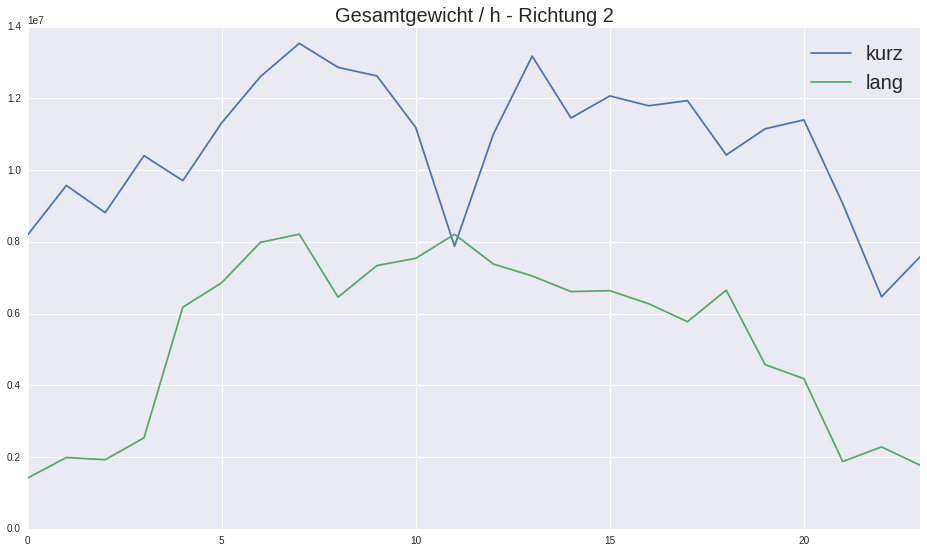

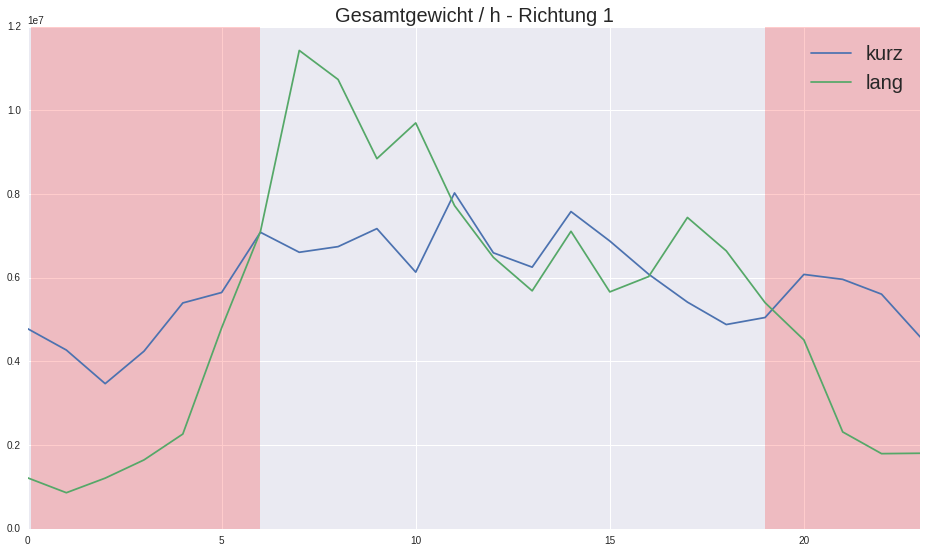

In [23]:
for richtung in frame.Richtung.unique():
   
    fig, ax = pl.subplots(1, figsize=(16, 9))
    kurz_per_hour = kurz[kurz.Richtung == richtung].groupby('Stunde').sum()
    lang_per_hour = lang[lang.Richtung == richtung].groupby('Stunde').sum()
    x = np.arange(len(kurz_per_hour))
    ax.plot(x, kurz_per_hour.GG, label='kurz')
    ax.plot(x, lang_per_hour.GG, label='lang')
    ax.set_xlim([0, 23])
    ax.set_title('Gesamtgewicht / h - Richtung {}'.format(richtung), fontsize=20)
    ax.legend(fontsize=20);
ax.axvspan(.1, 6, color='r', alpha=0.2, lw=0)
ax.axvspan(19, 24, color='r', alpha=0.2, lw=0);